## Stacking and Unstacking using Pandas

In [3]:
row_level0_label = ["tata", "Birla", "Wipro", "TCS"]
row_level1_label = ["Tech", "FCMG"]
col_list1 = [2022, 2023]
col_list2 = ["Q1", "Q2"]

In [2]:
import numpy as np
import pandas as pd

np.random.seed(23)
n84 = np.arange(2000, 2032).reshape(8,4)

In [9]:
row_labels = pd.MultiIndex.from_product([row_level0_label, row_level1_label])
col_lables = pd.MultiIndex.from_product([col_list1, col_list2])

df = pd.DataFrame(n84, index=row_labels, columns=col_lables)
df

2022        2023      
              Q1    Q2    Q1    Q2
tata  Tech  2000  2001  2002  2003
      FCMG  2004  2005  2006  2007
Birla Tech  2008  2009  2010  2011
      FCMG  2012  2013  2014  2015
Wipro Tech  2016  2017  2018  2019
      FCMG  2020  2021  2022  2023
TCS   Tech  2024  2025  2026  2027
      FCMG  2028  2029  2030  2031

In [15]:
df.loc[("Birla", "FCMG"), (2022, "Q2")]

2013

In [11]:
df.stack(level=0)


Q1    Q2
tata  Tech 2022  2000  2001
           2023  2002  2003
      FCMG 2022  2004  2005
           2023  2006  2007
Birla Tech 2022  2008  2009
           2023  2010  2011
      FCMG 2022  2012  2013
           2023  2014  2015
Wipro Tech 2022  2016  2017
           2023  2018  2019
      FCMG 2022  2020  2021
           2023  2022  2023
TCS   Tech 2022  2024  2025
           2023  2026  2027
      FCMG 2022  2028  2029
           2023  2030  2031

In [12]:
df.unstack(level=1)

2022                    2023                  
         Q1          Q2          Q1          Q2      
       FCMG  Tech  FCMG  Tech  FCMG  Tech  FCMG  Tech
Birla  2012  2008  2013  2009  2014  2010  2015  2011
TCS    2028  2024  2029  2025  2030  2026  2031  2027
Wipro  2020  2016  2021  2017  2022  2018  2023  2019
tata   2004  2000  2005  2001  2006  2002  2007  2003

In [13]:
df.stack(level=0).unstack(level=0).unstack(level=0)

Q1                                              Q2                    \
     Birla         TCS       Wipro        tata       Birla         TCS         
      FCMG  Tech  FCMG  Tech  FCMG  Tech  FCMG  Tech  FCMG  Tech  FCMG  Tech   
2022  2012  2008  2028  2024  2020  2016  2004  2000  2013  2009  2029  2025   
2023  2014  2010  2030  2026  2022  2018  2006  2002  2015  2011  2031  2027   

                              
     Wipro        tata        
      FCMG  Tech  FCMG  Tech  
2022  2021  2017  2005  2001  
2023  2023  2019  2007  2003

In [14]:
df.stack(level=0).unstack(level=0).unstack(level=0).stack(1)

Q1          Q2      
            FCMG  Tech  FCMG  Tech
2022 Birla  2012  2008  2013  2009
     TCS    2028  2024  2029  2025
     Wipro  2020  2016  2021  2017
     tata   2004  2000  2005  2001
2023 Birla  2014  2010  2015  2011
     TCS    2030  2026  2031  2027
     Wipro  2022  2018  2023  2019
     tata   2006  2002  2007  2003

In [16]:
df

2022        2023      
              Q1    Q2    Q1    Q2
tata  Tech  2000  2001  2002  2003
      FCMG  2004  2005  2006  2007
Birla Tech  2008  2009  2010  2011
      FCMG  2012  2013  2014  2015
Wipro Tech  2016  2017  2018  2019
      FCMG  2020  2021  2022  2023
TCS   Tech  2024  2025  2026  2027
      FCMG  2028  2029  2030  2031

In [19]:
df.stack(level=1) # updates the dataframe with given column level into row level
# here the level 1 columns Q1 and Q2 are transformed inot rows by making one level column i.e year
# and Unstacking works opposite of stacking process with row index

2022  2023
tata  Tech Q1  2000  2002
           Q2  2001  2003
      FCMG Q1  2004  2006
           Q2  2005  2007
Birla Tech Q1  2008  2010
           Q2  2009  2011
      FCMG Q1  2012  2014
           Q2  2013  2015
Wipro Tech Q1  2016  2018
           Q2  2017  2019
      FCMG Q1  2020  2022
           Q2  2021  2023
TCS   Tech Q1  2024  2026
           Q2  2025  2027
      FCMG Q1  2028  2030
           Q2  2029  2031

### Concat

In [21]:
df1 = pd.read_csv("../lds_files/lds11.csv")
df2 = pd.read_csv("../lds_files/lds12.csv")
df3 = pd.read_csv("../lds_files/lds13.csv")

print(df1)
print(df2)
print(df3)

                 Vol    Rev  Exp Sector  EmpCnt
Kolkata_FMCG     900  874.4  676    Pub    1379
NCR_Leagles      931  863.5  605    Pub    1935
Bombay_Sporting  975  839.8  615    Pvt     154
                   Vol    Rev  Exp Sector   HQ
Bombay_Sporting    925  839.8  715    Pvt  Mum
Bombay_Finance     899  917.0  674    Pub  Mum
Bangalore_Systems  931  881.6  650    Gov  Blr
Chennai_Shipping   992  821.0  665    Pub  Che
                     Vol    Rev  Exp Sector  EmpCnt   HQ
Bangalore_Breweries  966  805.0  895    Pvt     119  Blr
Chennai_Chemicals    966  863.2  608    Pub    1656  Che
Indi_Services        954  733.0  609    Gov   13023  NCR


In [23]:
dfc1 = pd.concat(objs=(df1,df2), axis=0, join="outer", keys=None)
dfc1

,Vol,Rev,Exp,Sector,EmpCnt,HQ
Kolkata_FMCG,900,874.4,676,Pub,1379.0,NaN
NCR_Leagles,931,863.5,605,Pub,1935.0,NaN
Bombay_Sporting,975,839.8,615,Pvt,154.0,NaN
Bombay_Sporting,925,839.8,715,Pvt,NaN,Mum
Bombay_Finance,899,917.0,674,Pub,NaN,Mum
Bangalore_Systems,931,881.6,650,Gov,NaN,Blr
Chennai_Shipping,992,821.0,665,Pub,NaN,Che


In [24]:
dfc1.index

Index(['Kolkata_FMCG', 'NCR_Leagles', 'Bombay_Sporting', 'Bombay_Sporting',
       'Bombay_Finance', 'Bangalore_Systems', 'Chennai_Shipping'],
      dtype='object')

In [25]:
dfc2 = pd.concat(objs=(df1,df2), axis=0, join="inner", keys=["F11", "F12"])
dfc2

Vol    Rev  Exp Sector
F11 Kolkata_FMCG       900  874.4  676    Pub
    NCR_Leagles        931  863.5  605    Pub
    Bombay_Sporting    975  839.8  615    Pvt
F12 Bombay_Sporting    925  839.8  715    Pvt
    Bombay_Finance     899  917.0  674    Pub
    Bangalore_Systems  931  881.6  650    Gov
    Chennai_Shipping   992  821.0  665    Pub

In [30]:
dfc2 = pd.concat(objs=(df1,df2), axis=1, join="outer", keys=["F11", "F12"])
dfc2

F11                                 F12                \
                     Vol    Rev    Exp Sector  EmpCnt    Vol    Rev    Exp   
Kolkata_FMCG       900.0  874.4  676.0    Pub  1379.0    NaN    NaN    NaN   
NCR_Leagles        931.0  863.5  605.0    Pub  1935.0    NaN    NaN    NaN   
Bombay_Sporting    975.0  839.8  615.0    Pvt   154.0  925.0  839.8  715.0   
Bombay_Finance       NaN    NaN    NaN    NaN     NaN  899.0  917.0  674.0   
Bangalore_Systems    NaN    NaN    NaN    NaN     NaN  931.0  881.6  650.0   
Chennai_Shipping     NaN    NaN    NaN    NaN     NaN  992.0  821.0  665.0   

                               
                  Sector   HQ  
Kolkata_FMCG         NaN  NaN  
NCR_Leagles          NaN  NaN  
Bombay_Sporting      Pvt  Mum  
Bombay_Finance       Pub  Mum  
Bangalore_Systems    Gov  Blr  
Chennai_Shipping     Pub  Che

In [31]:
dfc3 = pd.concat(objs=(df1,df2, df3), axis=1, join="outer", keys=["F11", "F12"])
dfc3

C:\Users\lokesh\AppData\Local\Temp\ipykernel_40244\3874318101.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  dfc3 = pd.concat(objs=(df1,df2, df3), axis=1, join="outer", keys=["F11", "F12"])


F11                                 F12                \
                     Vol    Rev    Exp Sector  EmpCnt    Vol    Rev    Exp   
Kolkata_FMCG       900.0  874.4  676.0    Pub  1379.0    NaN    NaN    NaN   
NCR_Leagles        931.0  863.5  605.0    Pub  1935.0    NaN    NaN    NaN   
Bombay_Sporting    975.0  839.8  615.0    Pvt   154.0  925.0  839.8  715.0   
Bombay_Finance       NaN    NaN    NaN    NaN     NaN  899.0  917.0  674.0   
Bangalore_Systems    NaN    NaN    NaN    NaN     NaN  931.0  881.6  650.0   
Chennai_Shipping     NaN    NaN    NaN    NaN     NaN  992.0  821.0  665.0   

                               
                  Sector   HQ  
Kolkata_FMCG         NaN  NaN  
NCR_Leagles          NaN  NaN  
Bombay_Sporting      Pvt  Mum  
Bombay_Finance       Pub  Mum  
Bangalore_Systems    Gov  Blr  
Chennai_Shipping     Pub  Che

### Merging Dataframe

In [3]:
df21 = pd.read_csv("../lds_files/lds21.csv")
df22 = pd.read_csv("../lds_files/lds22.csv")
df23 = pd.read_csv("../lds_files/lds23.csv")

print(df21)
print(df22)
print(df23)

                    stock_id   HQ  high
Bangalore_Breweries     BREW  Blr  1100
Chennai_Shipping        SHIP  Che  1200
Kolkata_FMCG            KFMC  Kol  2000
NCR_Leagles             NCRL  NCR  1200
                    stock_name   HQ  vol
Bangalore_Breweries       BREW  Blr  350
Bombay_Finance            BFIN  Mum  450
Chennai_Chemicals         CHEM  Che  550
Kolkata_FMCG              KFMC  Kol  500
                    stock_name   HQ  empcnt
Chennai_Shipping          SHIP  Che   10000
Bangalore_Breweries       BREW  Blr    5000
Bombay_Finance            BFIN  Mum   30000
Bangalore_Systems         BSYS  Blr   20000


In [4]:
dfm1 = pd.merge(df21, df22) # it will analyse the data and picks the common column on them
dfm1

,stock_id,HQ,high,stock_name,vol
0,BREW,Blr,1100,BREW,350
1,SHIP,Che,1200,CHEM,550
2,KFMC,Kol,2000,KFMC,500


In [7]:
dfm1 = pd.merge(left=df21, right=df22, how="inner", on="HQ", indicator=True)
dfm1 # during the merging the index labels will be trucated, since they cannot be categoried with this data frames for example 
# the value che is in both the table but their index labels are diffrent because of this index labels will be trucated

,stock_id,HQ,high,stock_name,vol,_merge
0,BREW,Blr,1100,BREW,350,both
1,SHIP,Che,1200,CHEM,550,both
2,KFMC,Kol,2000,KFMC,500,both


In [8]:
dfm1 = pd.merge(left=df21, right=df22, how="outer", on="HQ", indicator=True)
dfm1

,stock_id,HQ,high,stock_name,vol,_merge
0,BREW,Blr,1100.0,BREW,350.0,both
1,SHIP,Che,1200.0,CHEM,550.0,both
2,KFMC,Kol,2000.0,KFMC,500.0,both
3,NCRL,NCR,1200.0,NaN,NaN,left_only
4,NaN,Mum,NaN,BFIN,450.0,right_only


In [11]:
dfm1 = pd.merge(left=df21, right=df22, how="cross", on="HQ", indicator=True)
dfm1 # cross join will not take the on parameter as it will create fresh set of df with every column, as it gives 9X9 if given both are 3X3

MergeError: Can not pass on, right_on, left_on or set right_index=True or left_index=True

In [10]:
dfm1 = pd.merge(left=df21, right=df22, how="cross", indicator=True)
dfm1

,stock_id,HQ_x,high,stock_name,HQ_y,vol,_merge
0,BREW,Blr,1100,BREW,Blr,350,both
1,BREW,Blr,1100,BFIN,Mum,450,both
2,BREW,Blr,1100,CHEM,Che,550,both
3,BREW,Blr,1100,KFMC,Kol,500,both
4,SHIP,Che,1200,BREW,Blr,350,both
5,SHIP,Che,1200,BFIN,Mum,450,both
6,SHIP,Che,1200,CHEM,Che,550,both
7,SHIP,Che,1200,KFMC,Kol,500,both
8,KFMC,Kol,2000,BREW,Blr,350,both
9,KFMC,Kol,2000,BFIN,Mum,450,both


In [14]:
dfm1 = pd.merge(left=df22, right=df23, how="inner", on=["stock_name", "HQ"], indicator=True)
dfm1

,stock_name,HQ,vol,empcnt,_merge
0,BREW,Blr,350,5000,both
1,BFIN,Mum,450,30000,both


In [15]:
dfm1 = pd.merge(left=df21, right=df22, how="inner", left_on="stock_id", right_on="stock_name", indicator=True)
dfm1

,stock_id,HQ_x,high,stock_name,HQ_y,vol,_merge
0,BREW,Blr,1100,BREW,Blr,350,both
1,KFMC,Kol,2000,KFMC,Kol,500,both


In [16]:
dfm1 = pd.merge(left=df21, right=df22, how="inner", left_on="stock_id", right_on="stock_name", left_index=True, indicator=True)
dfm1

MergeError: Can only pass argument "left_on" OR "left_index" not both.

In [24]:
dfm1 = pd.merge(left=df21, right=df22, how="inner", left_index=True, right_index=True, indicator=True)
dfm1

,stock_id,HQ_x,high,stock_name,HQ_y,vol,_merge
Bangalore_Breweries,BREW,Blr,1100,BREW,Blr,350,both
Kolkata_FMCG,KFMC,Kol,2000,KFMC,Kol,500,both


### Missing Value hadling (NaN handling process)

In [29]:
df = pd.read_csv("../lds_files/lds0.csv")
df

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Deccan_Sporting,931,839.80,615,Pvt,NaN,Hyd,1,SPRT,Services,Mar 1943
Kolkata_FMCG,925,NaN,676,NaN,1379.0,Kol,0,KFMC,Goods,Jan 1920
NCR_Leagles,931,863.50,605,NaN,1935.0,NCR,0,NCRL,Services,Feb 1960
Bangalore_Systems,900,NaN,650,Gov,1361.0,Blr,0,BSYS,Services,Apr 1950
Chennai_Chemicals,966,863.20,608,Pub,1656.0,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.00,609,Gov,13023.0,NCR,0,INDI,Services,Mar 1920
Bangalore_Breweries,966,NaN,895,NaN,119.0,Blr,1,BREW,Goods,Oct 1971
Bombay_Finance,899,NaN,674,Pub,NaN,Mum,0,BFIN,Services,Apr 1925
Chennai_Shipping,992,821.00,665,NaN,1154.0,Che,1,SHIP,Goods,Nov 1930
Eastern_Estates,945,834.23,789,Pvt,1873.0,NaN,1,EEST,Goods,Jan 1994


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Deccan_Sporting to Eastern_Estates
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vol      10 non-null     int64  
 1   Rev      6 non-null      float64
 2   Exp      10 non-null     int64  
 3   Sector   6 non-null      object 
 4   EmpCnt   8 non-null      float64
 5   HQ       9 non-null      object 
 6   MNC      10 non-null     int64  
 7   StockID  10 non-null     object 
 8   GST      10 non-null     object 
 9   Started  10 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 880.0+ bytes


In [34]:
print(df.Sector.count())
df.isna().sum() # to populate the Null values available on each column

6


Vol        0
Rev        4
Exp        0
Sector     4
EmpCnt     2
HQ         1
MNC        0
StockID    0
GST        0
Started    0
dtype: int64

In [35]:
df.isna().sum().sum()  # to get the total Nan available in the data set, if this gives zero then it shoud be considered as there are no Null values available in the  data set.

11

In [36]:
df.dropna() # to drop records having Nan 

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Chennai_Chemicals,966,863.2,608,Pub,1656.0,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.0,609,Gov,13023.0,NCR,0,INDI,Services,Mar 1920


In [39]:
# Fill Nan values into Data Set
df.Rev.fillna(df.Rev.mean(), inplace=True)
df

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Deccan_Sporting,931,839.800000,615,Pvt,NaN,Hyd,1,SPRT,Services,Mar 1943
Kolkata_FMCG,925,825.788333,676,NaN,1379.0,Kol,0,KFMC,Goods,Jan 1920
NCR_Leagles,931,863.500000,605,NaN,1935.0,NCR,0,NCRL,Services,Feb 1960
Bangalore_Systems,900,825.788333,650,Gov,1361.0,Blr,0,BSYS,Services,Apr 1950
Chennai_Chemicals,966,863.200000,608,Pub,1656.0,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.000000,609,Gov,13023.0,NCR,0,INDI,Services,Mar 1920
Bangalore_Breweries,966,825.788333,895,NaN,119.0,Blr,1,BREW,Goods,Oct 1971
Bombay_Finance,899,825.788333,674,Pub,NaN,Mum,0,BFIN,Services,Apr 1925
Chennai_Shipping,992,821.000000,665,NaN,1154.0,Che,1,SHIP,Goods,Nov 1930
Eastern_Estates,945,834.230000,789,Pvt,1873.0,NaN,1,EEST,Goods,Jan 1994


In [40]:
df.EmpCnt.median()

1517.5

In [42]:
df.EmpCnt.fillna(df.EmpCnt.median(), inplace=True) # here we are using the median since the mean value is too high just because we have one record with high spike of this attribute, compared to other records.
df

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Deccan_Sporting,931,839.800000,615,Pvt,1517.5,Hyd,1,SPRT,Services,Mar 1943
Kolkata_FMCG,925,825.788333,676,NaN,1379.0,Kol,0,KFMC,Goods,Jan 1920
NCR_Leagles,931,863.500000,605,NaN,1935.0,NCR,0,NCRL,Services,Feb 1960
Bangalore_Systems,900,825.788333,650,Gov,1361.0,Blr,0,BSYS,Services,Apr 1950
Chennai_Chemicals,966,863.200000,608,Pub,1656.0,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.000000,609,Gov,13023.0,NCR,0,INDI,Services,Mar 1920
Bangalore_Breweries,966,825.788333,895,NaN,119.0,Blr,1,BREW,Goods,Oct 1971
Bombay_Finance,899,825.788333,674,Pub,1517.5,Mum,0,BFIN,Services,Apr 1925
Chennai_Shipping,992,821.000000,665,NaN,1154.0,Che,1,SHIP,Goods,Nov 1930
Eastern_Estates,945,834.230000,789,Pvt,1873.0,NaN,1,EEST,Goods,Jan 1994


* Dealing with Labeled / Non Numeric values which have Nan values

In [43]:
df.Sector.fillna(method="bfill") # backward filling, this can be achived with Sector.bfill or ffill method

C:\Users\lokesh\AppData\Local\Temp\ipykernel_14932\885500955.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Sector.fillna(method="bfill") # backward filling


Deccan_Sporting        Pvt
Kolkata_FMCG           Gov
NCR_Leagles            Gov
Bangalore_Systems      Gov
Chennai_Chemicals      Pub
Indi_Services          Gov
Bangalore_Breweries    Pub
Bombay_Finance         Pub
Chennai_Shipping       Pvt
Eastern_Estates        Pvt
Name: Sector, dtype: object

In [46]:
df.Sector.ffill()
df.Sector.bfill(inplace=True)
df

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Deccan_Sporting,931,839.800000,615,Pvt,1517.5,Hyd,1,SPRT,Services,Mar 1943
Kolkata_FMCG,925,825.788333,676,Gov,1379.0,Kol,0,KFMC,Goods,Jan 1920
NCR_Leagles,931,863.500000,605,Gov,1935.0,NCR,0,NCRL,Services,Feb 1960
Bangalore_Systems,900,825.788333,650,Gov,1361.0,Blr,0,BSYS,Services,Apr 1950
Chennai_Chemicals,966,863.200000,608,Pub,1656.0,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.000000,609,Gov,13023.0,NCR,0,INDI,Services,Mar 1920
Bangalore_Breweries,966,825.788333,895,Pub,119.0,Blr,1,BREW,Goods,Oct 1971
Bombay_Finance,899,825.788333,674,Pub,1517.5,Mum,0,BFIN,Services,Apr 1925
Chennai_Shipping,992,821.000000,665,Pvt,1154.0,Che,1,SHIP,Goods,Nov 1930
Eastern_Estates,945,834.230000,789,Pvt,1873.0,NaN,1,EEST,Goods,Jan 1994


In [47]:
df["HQ"] = df.HQ.ffill().bfill()
df

,Vol,Rev,Exp,Sector,EmpCnt,HQ,MNC,StockID,GST,Started
Deccan_Sporting,931,839.800000,615,Pvt,1517.5,Hyd,1,SPRT,Services,Mar 1943
Kolkata_FMCG,925,825.788333,676,Gov,1379.0,Kol,0,KFMC,Goods,Jan 1920
NCR_Leagles,931,863.500000,605,Gov,1935.0,NCR,0,NCRL,Services,Feb 1960
Bangalore_Systems,900,825.788333,650,Gov,1361.0,Blr,0,BSYS,Services,Apr 1950
Chennai_Chemicals,966,863.200000,608,Pub,1656.0,Che,1,CHEM,Goods,Aug 1928
Indi_Services,954,733.000000,609,Gov,13023.0,NCR,0,INDI,Services,Mar 1920
Bangalore_Breweries,966,825.788333,895,Pub,119.0,Blr,1,BREW,Goods,Oct 1971
Bombay_Finance,899,825.788333,674,Pub,1517.5,Mum,0,BFIN,Services,Apr 1925
Chennai_Shipping,992,821.000000,665,Pvt,1154.0,Che,1,SHIP,Goods,Nov 1930
Eastern_Estates,945,834.230000,789,Pvt,1873.0,Che,1,EEST,Goods,Jan 1994


## Visualization

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
cars_ds = pd.read_csv("../lds_files/lds41.csv")
cars_ds

,model,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,2.620,16.46,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,1,4,4
2,Datsun 710,22.8,4,108.0,93,2.320,18.61,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,3,2
5,Valiant,18.1,6,225.0,105,3.460,20.22,0,3,1
6,Duster 360,14.3,8,360.0,245,3.570,15.84,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.190,20.00,0,4,2
8,Merc 230,22.8,4,140.8,95,3.150,22.90,0,4,2
9,Merc 280,19.2,6,167.6,123,3.440,18.30,0,4,4


##### Line Plotting

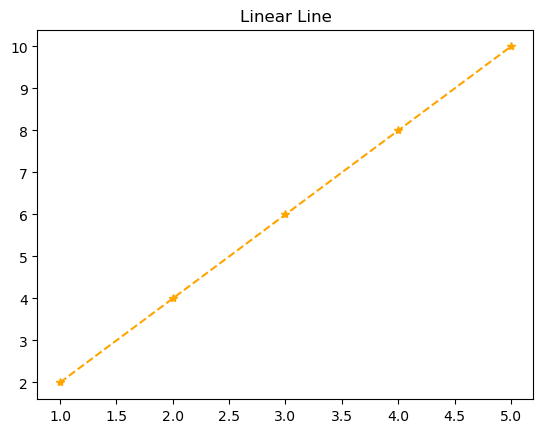

In [11]:
x1 = np.arange(1,6)
y1 = x1 *2
y2 = x1 ** 2

plt.plot(x1, y1, color="orange", marker="*", linestyle="--")
plt.title("Linear Line")
plt.show()

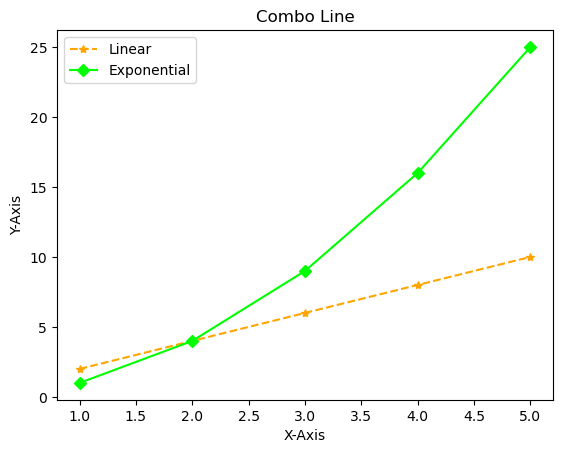

Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [33]:
plt.plot(x1, y1, color="orange", marker="*", linestyle="--", label="Linear")
plt.plot(x1, y2, color="#00ff00", marker="D", label="Exponential")

plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

plt.title("Combo Line")
plt.legend()

plt.show()

plt.savefig("../output/images/ComboPlot1.jpg")

f = plt.gcf()
print(f)
plt.show()


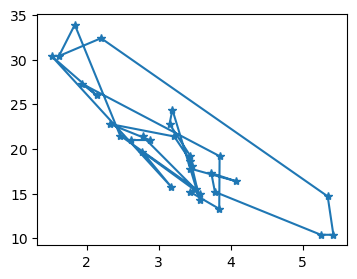

In [66]:
# plotting with cars_ds
plt.figure(figsize=(4,3), dpi=100)
plt.plot(cars_ds.wt, cars_ds.mpg, marker="*")

plt.show()

<Axes: xlabel='wt'>

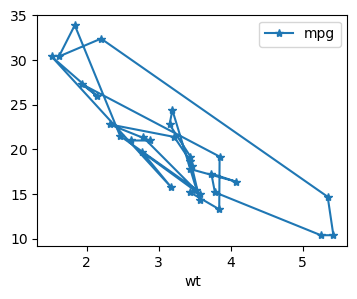

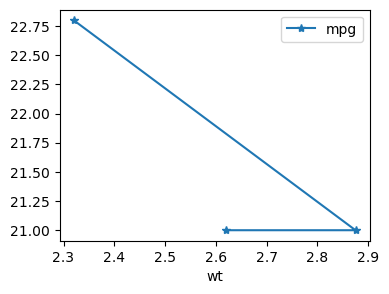

In [72]:
# Plotting with Pandas Data Frame

cars_ds.plot(x="wt", y="mpg", figsize=(4,3), marker="*")
cars_ds[:3].plot(x="wt", y="mpg", figsize=(4,3), marker="*")

<Axes: xlabel='wt'>

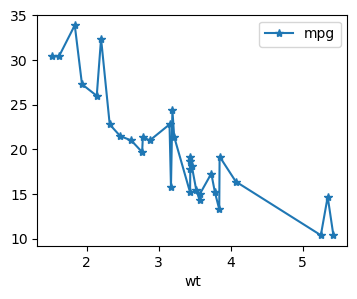

In [70]:

cars_ds.sort_values(by="wt").plot(x="wt", y="mpg", figsize=(4,3), marker="*")

### Scatter Plotting

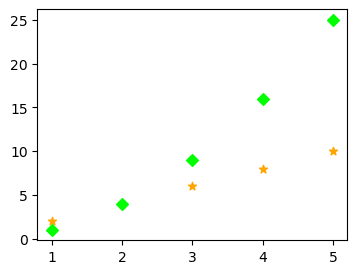

In [12]:
plt.figure(figsize=(4,3), dpi=100)
plt.scatter(x1, y1, color="orange", marker="*",label="Linear")
plt.scatter(x1, y2, color="#00ff00", marker="D", label="Exponential")

plt.show()

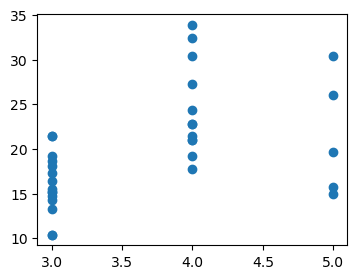

In [13]:
plt.figure(figsize=(4,3), dpi=100)
plt.scatter(x=cars_ds.gear, y=cars_ds.mpg)

<Axes: xlabel='gear', ylabel='mpg'>

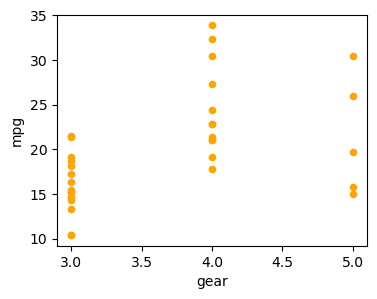

In [17]:
cars_ds.plot(x="gear", y="mpg", kind="scatter", figsize=(4,3), color="orange")


<Axes: ylabel='mpg'>

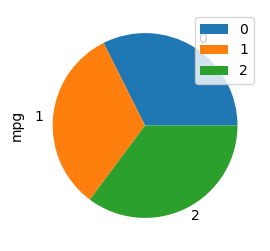

In [7]:
cars_ds[:3].plot(x="wt", y="mpg", figsize=(4,3), kind="pie")

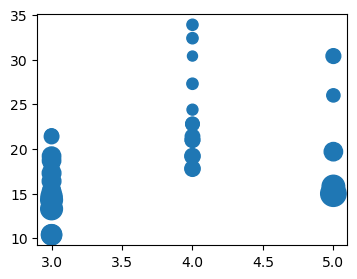

In [8]:
plt.figure(figsize=(4,3), dpi=100)
plt.scatter(x=cars_ds.gear, y=cars_ds.mpg, s=cars_ds.hp) # using data frame for scatter point based on the car hp value
plt.show()

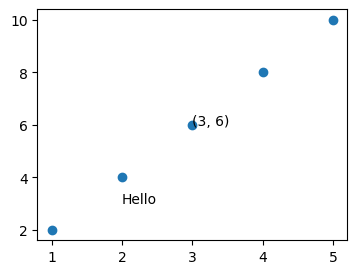

In [13]:
plt.figure(figsize=(4,3), dpi=100)
plt.scatter(x=x1, y=y1, label="Linear")
plt.text(2,3, "Hello")
ns = "({}, {})".format(3,6)
plt.text(3,6, ns)
plt.show()

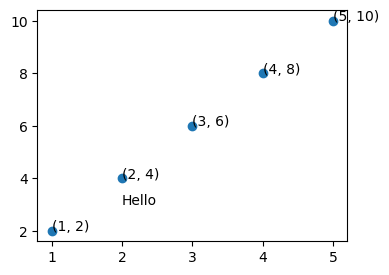

In [17]:
plt.figure(figsize=(4,3), dpi=100)
plt.scatter(x=x1, y=y1, label="Linear")
plt.text(2,3, "Hello")

for xt,yt in zip(x1,y1):
    ns = "({}, {})".format(xt,yt)
    plt.text(xt,yt, ns)
plt.show()

### Bar Plots

<BarContainer object of 4 artists>

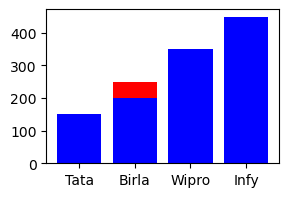

In [29]:
cnames = ["Tata", "Birla", "Wipro", "Infy"]
e1count = [100,250,300,400]
e2count = [150, 200, 350, 450]

plt.figure(figsize=(3,2), dpi=100)
plt.bar(x=cnames, height=e1count, color="red")
plt.bar(x=cnames, height=e2count,  color="blue")

<BarContainer object of 4 artists>

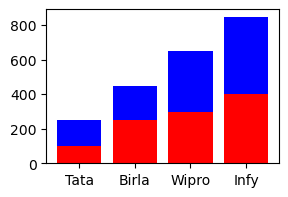

In [30]:
plt.figure(figsize=(3,2), dpi=100)
plt.bar(x=cnames, height=e1count, color="red")
plt.bar(x=cnames, height=e2count,  color="blue",bottom=e1count) # plot the one top of another so that each bar will  be visble on plot, it can be controlled with bottom parameter

#### Horizontal bar Plots or H stacked bar cahrt

([<matplotlib.axis.XTick at 0x14a00378d50>,
 [Text(0.2, 0, 'Tata'),
  Text(1.2, 0, 'Birla'),
  Text(2.2, 0, 'Wipro'),
  Text(3.2, 0, 'Infy')])

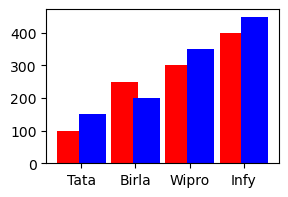

In [31]:
xtick_values = np.arange(len(cnames))

plt.figure(figsize=(3,2), dpi=100)
plt.bar(x=xtick_values, height=e1count, color="red", width=0.5)
plt.bar(x=xtick_values+0.4, height=e2count,  color="blue", width=0.5)

plt.xticks(xtick_values+0.2, cnames)


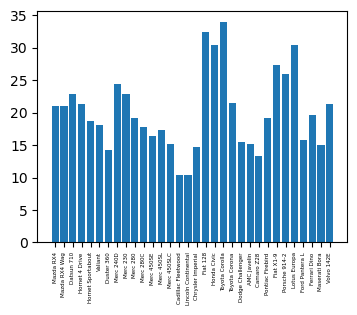

In [38]:
plt.figure(figsize=(4,3), dpi=100)
plt.bar(x=cars_ds.model, height=cars_ds.mpg)
plt.xticks(rotation=90, fontsize=4)
plt.show()

<Axes: xlabel='model'>

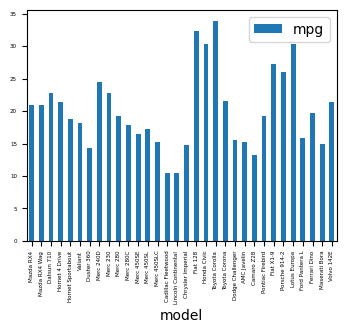

In [40]:
cars_ds.plot(kind="bar", x="model", y="mpg", figsize=(4,3), fontsize=4)

<Axes: ylabel='model'>

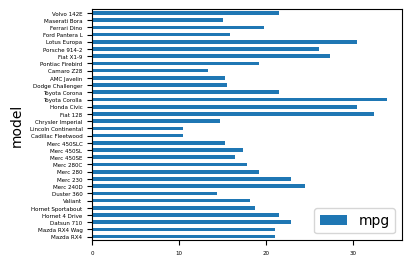

In [41]:
cars_ds.plot(kind="barh", x="model", y="mpg", figsize=(4,3), fontsize=4)

### Histogram

In [45]:
np.random.seed(23)
marks = np.random.randint(low=0, high=101, size=100)

print("Min", marks.min())
print("Max", marks.max())
print("Mean", marks.mean())

marks

Min 0
Max 100
Mean 49.69


array([ 83,  40,  73,  54,  31,  76,  91,  39,  90,  25,  51,   6,  45,
        12,  49,  66,  75,  85,  69,  64,  12,  21,  48,  41,  79,  90,
        62,  57,  19,  33,  59,  39,  15,  36,  65,   1,  43,  15,  86,
        83,  58,  25,  66,  74,  35,  96,  56,  13,  60,  22,  38,  31,
        94,  78,   0,  21,   6,  32,  98,  32,  14,  31,  78,  83,  80,
        70,  66,  82,  85,  55,  27,  62,  43,  74,  71,  42,  83,  21,
         6,  68,  22,  43,   8,  85,  62,  32,  60, 100,  11,   1,  41,
        26,  37,  41,  56,  39,  81,  32,  53,  35])

(array([ 7.,  8.,  9., 16., 11.,  9., 12., 10., 11.,  7.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

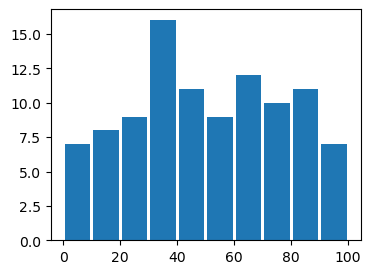

In [46]:
plt.figure(figsize=(4,3), dpi=100)
plt.hist(marks, rwidth=0.9, bins=10)

(array([10.,  9.,  8.,  4.,  1.]),
 array([ 52. , 108.6, 165.2, 221.8, 278.4, 335. ]),
 <BarContainer object of 5 artists>)

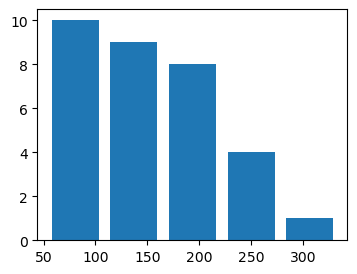

In [47]:
plt.figure(figsize=(4,3), dpi=100)
plt.hist(cars_ds.hp, rwidth=0.8, bins=5)

<Axes: ylabel='Frequency'>

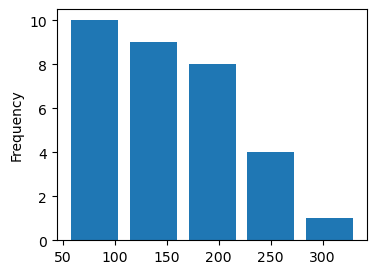

In [48]:
cars_ds.hp.plot(kind="hist", rwidth=0.8, bins=5, figsize=(4,3))

<Axes: ylabel='Density'>

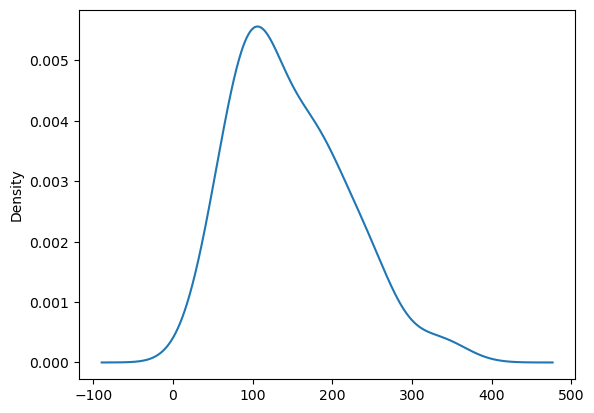

In [49]:
cars_ds.hp.plot(kind="kde")

#### Pie Chart

Pie Chart is type os chart which will be used to show case the hoiw much percentage does each record over the data set

([<matplotlib.patches.Wedge at 0x14a04b74f50>,
 [Text(0.10781885436251686, 1.0947031993394165, '3'),
  Text(-0.6111272563215624, -0.9146165735327998, '4'),
  Text(0.9701133907831904, -0.5185364105085978, '5')],
 [Text(0.05881028419773646, 0.597110836003318, '46.88'),
  Text(-0.3333421398117613, -0.4988817673815271, '37.50'),
  Text(0.5291527586090129, -0.28283804209559876, '15.62')])

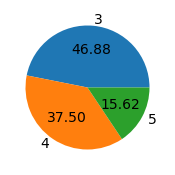

In [53]:
vc = cars_ds.gear.value_counts()
plt.figure(figsize=(2,3), dpi=100)
plt.pie(x=vc.values, labels=vc.index, autopct="%.2F", radius=1 )

Explode is used to pull out any element on the chart to visualize independently, it take the same size of the x parameter, and values in it should be within 0 - 1, since it considers it as percentage on the chart. if the value 

array([10, 10,  7,  3,  1,  1], dtype=int64)

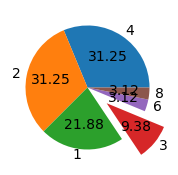

In [59]:
vc = cars_ds.carb.value_counts()

plt.figure(figsize=(2,3), dpi=100)
plt.pie(x=vc.values, labels=vc.index, autopct="%.2F", radius=1, explode=[0,0,0,0.4,0, 0] )
vc.values

#### Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x14a05e5c550>,
 'caps': [<matplotlib.lines.Line2D at 0x14a05e5d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a05da0cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x14a05e5ea50>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a05e5f150>],
 'means': []}

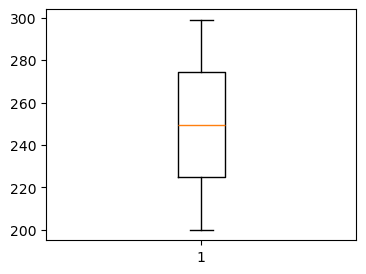

In [60]:
plt.figure(figsize=(4,3), dpi=100)
vl = list(range(200, 300))
plt.boxplot(vl)


{'whiskers': [<matplotlib.lines.Line2D at 0x14a05e8ea50>,
 'caps': [<matplotlib.lines.Line2D at 0x14a05da5f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a05e75c50>],
 'medians': [<matplotlib.lines.Line2D at 0x14a05da7fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a05dc1190>],
 'means': []}

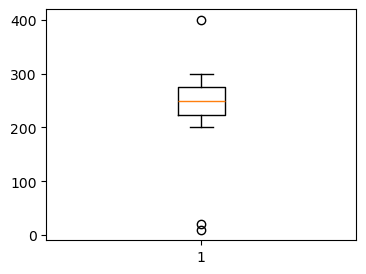

In [61]:
plt.figure(figsize=(4,3), dpi=100)
vl = list(range(200, 300))

vl.append(400)
vl.append(20)
vl.append(10)
plt.boxplot(vl)

<Axes: >

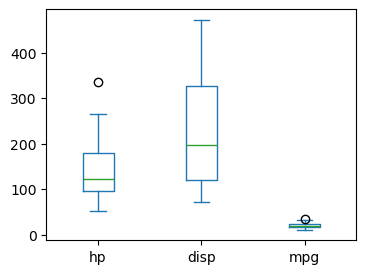

In [64]:
cars_ds[["hp", "disp", "mpg"]].plot(kind="box", figsize=(4,3))

## Seaborn 
### Scatter Family

<Axes: >

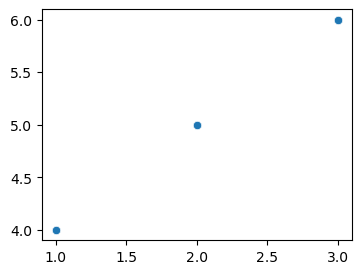

In [66]:
x = [1,2,3,1,2,3,1,2,3]
y = [4,5,6,4,5,6,4,5,6]

plt.figure(figsize=(4,3), dpi=100)
sb.scatterplot(x=x, y=y)

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

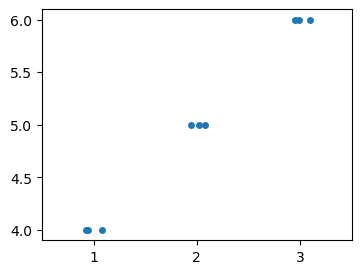

In [67]:
plt.figure(figsize=(4,3), dpi=100)
sb.stripplot(x=x, y=y)

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

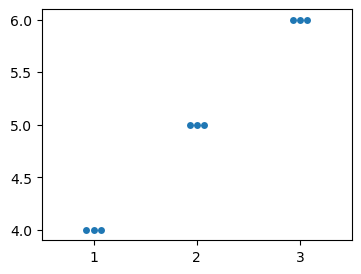

In [68]:
plt.figure(figsize=(4,3), dpi=100)
sb.swarmplot(x=x, y=y)

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gear', ylabel='mpg'>

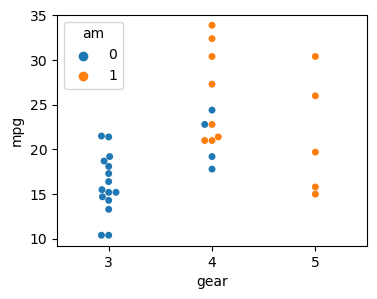

In [70]:
plt.figure(figsize=(4,3), dpi=100)
sb.swarmplot(data=cars_ds, x="gear", y="mpg", hue="am")

In [71]:
cars_ds

,model,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,2.620,16.46,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,1,4,4
2,Datsun 710,22.8,4,108.0,93,2.320,18.61,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,3,2
5,Valiant,18.1,6,225.0,105,3.460,20.22,0,3,1
6,Duster 360,14.3,8,360.0,245,3.570,15.84,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.190,20.00,0,4,2
8,Merc 230,22.8,4,140.8,95,3.150,22.90,0,4,2
9,Merc 280,19.2,6,167.6,123,3.440,18.30,0,4,4


In [72]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

#### DistPlot

C:\Users\lokesh\AppData\Local\Temp\ipykernel_2588\3925316400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(a=cars_ds.hp, hist=True, kde=True, rug=True, hist_kws={"rwidth":0.9, "color":"green"},
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version.

<Axes: xlabel='hp', ylabel='Density'>

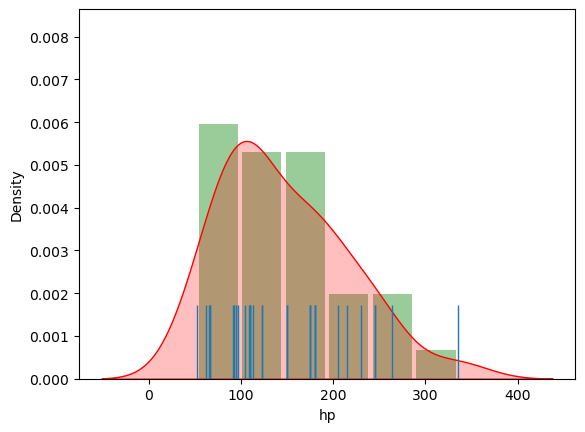

In [79]:
sb.distplot(a=cars_ds.hp, hist=True, kde=True, rug=True, hist_kws={"rwidth":0.9, "color":"green"}, 
            kde_kws={"shade": True, "color": "red"}, rug_kws={"height": 0.2})

Regression Plot

<Axes: xlabel='wt', ylabel='mpg'>

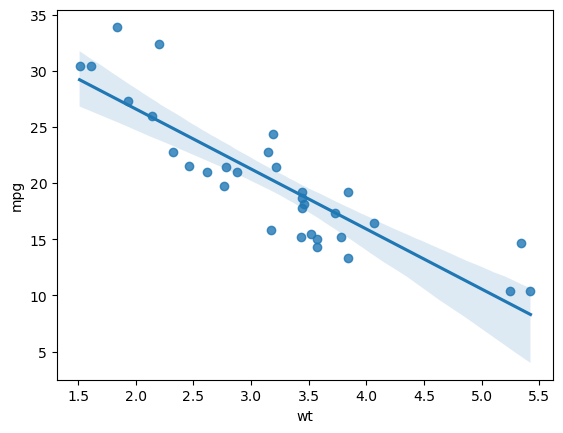

In [80]:
sb.regplot(data=cars_ds, x="wt", y="mpg") # This Plot tis combination of Regression Line and Scatter Plot for the given data set.

<Axes: >

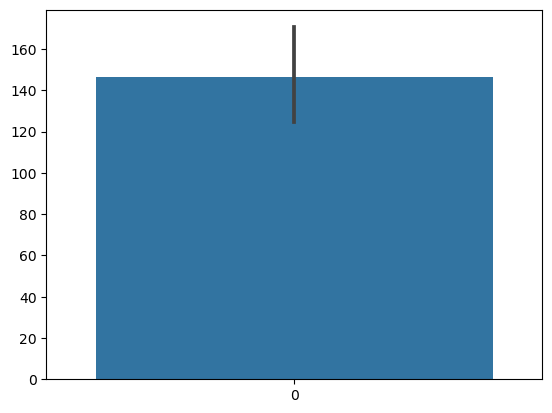

In [81]:
sb.barplot(cars_ds.hp)

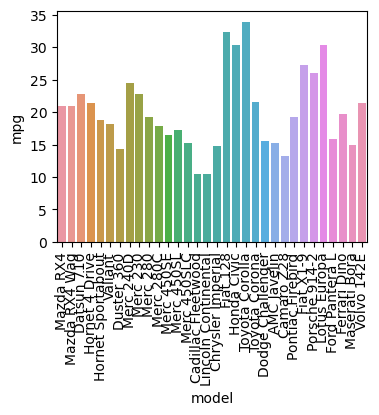

In [82]:
plt.figure(figsize=(4,3), dpi=100)
sb.barplot(data=cars_ds, x="model", y="mpg")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='gear', ylabel='count'>

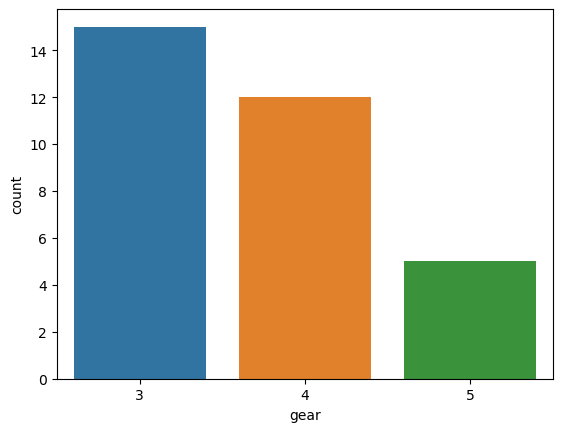

In [83]:
sb.countplot(data=cars_ds, x="gear")

<Axes: xlabel='gear', ylabel='hp'>

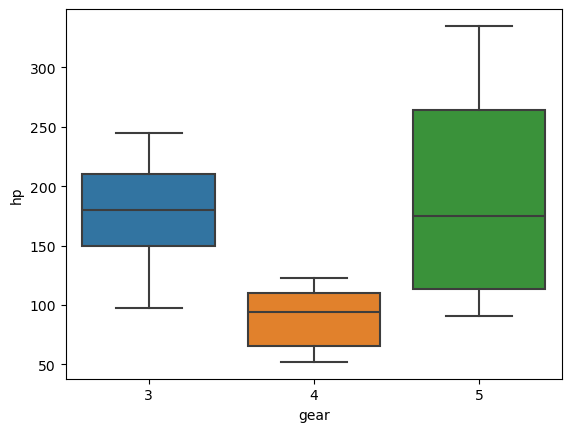

In [86]:
sb.boxplot(data=cars_ds, x="gear", y="hp")

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gear', ylabel='hp'>

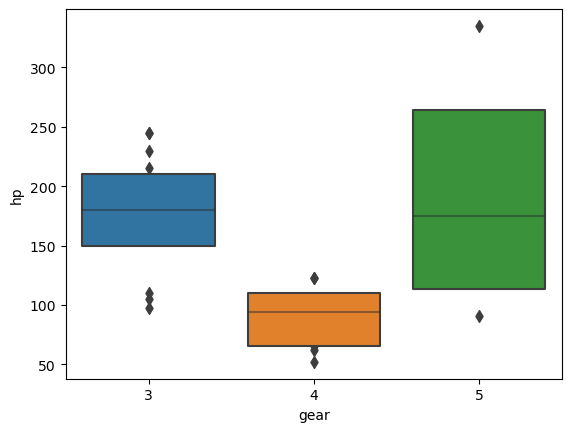

In [87]:
sb.boxenplot(data=cars_ds, x="gear", y="hp")

## Multi Plots
#### Joint Plots

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 400x300 with 0 Axes>

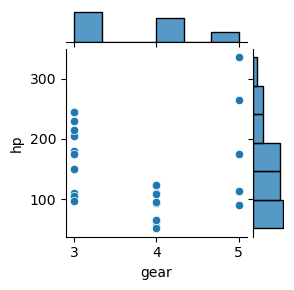

In [88]:
plt.figure(figsize=(4,3))
sb.jointplot(x=cars_ds.gear, y=cars_ds.hp, height=3)

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

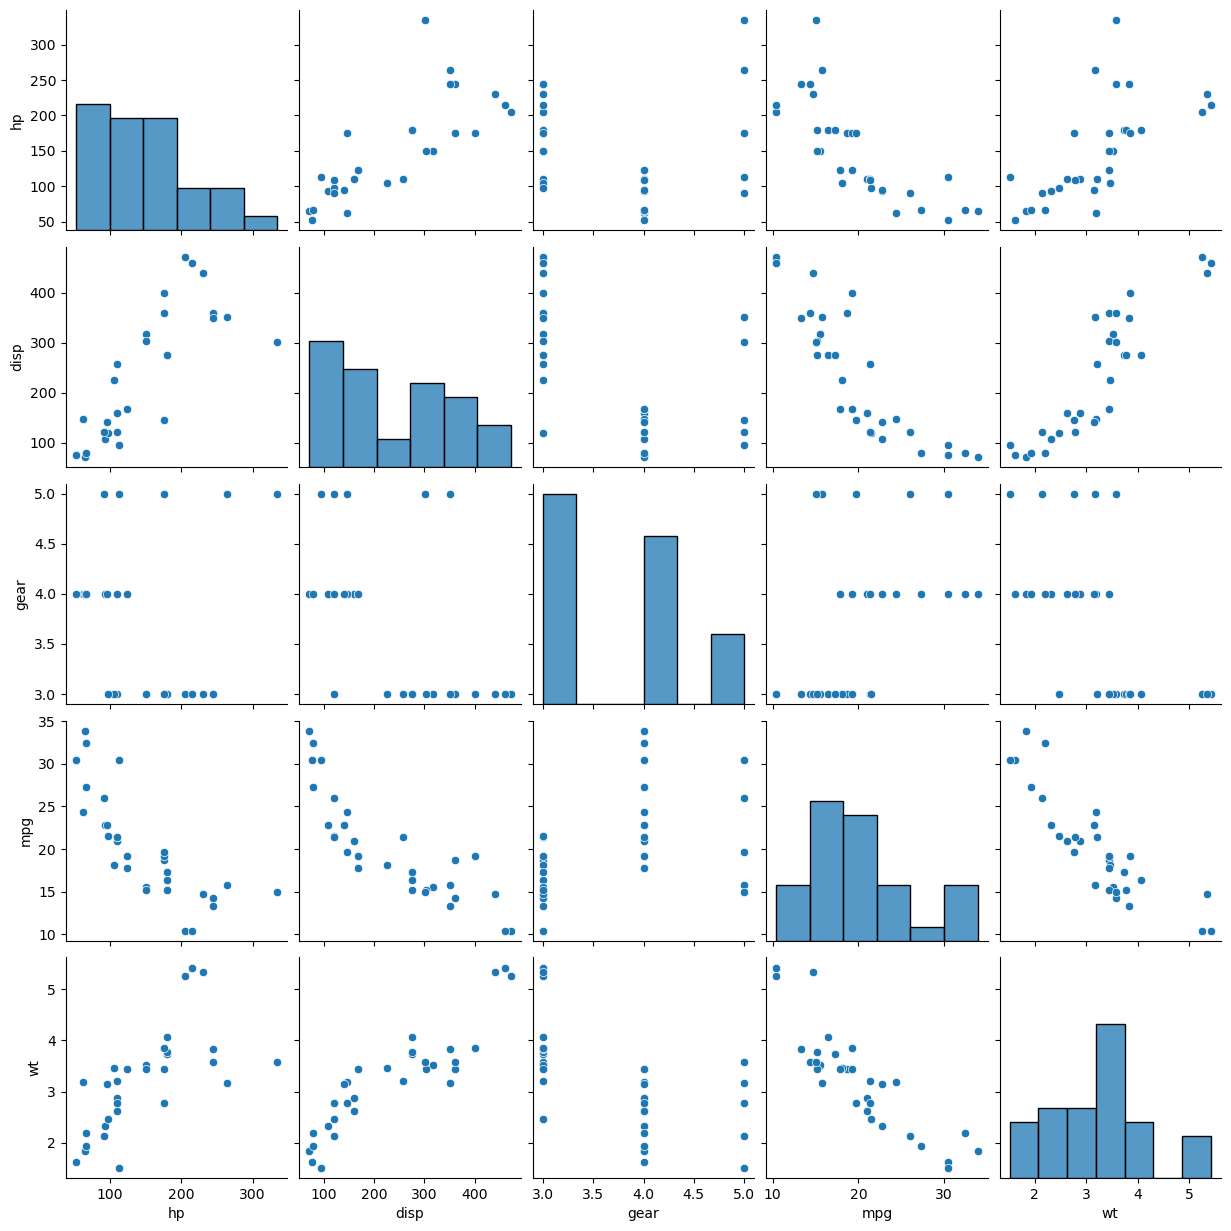

In [89]:
df = cars_ds[["hp", "disp", "gear", "mpg", "wt"]]
sb.pairplot(df)

In [90]:
cars_ds.corr(numeric_only=True)

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,-0.867659,0.418684,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,0.782496,-0.591242,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,0.887980,-0.433698,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,0.658748,-0.708223,-0.243204,-0.125704,0.749812
wt,-0.867659,0.782496,0.887980,0.658748,1.000000,-0.174716,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,-0.174716,1.000000,-0.229861,-0.212682,-0.656249
am,0.599832,-0.522607,-0.591227,-0.243204,-0.692495,-0.229861,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,-0.583287,-0.212682,0.794059,1.000000,0.274073
carb,-0.550925,0.526988,0.394977,0.749812,0.427606,-0.656249,0.057534,0.274073,1.000000


<Axes: >

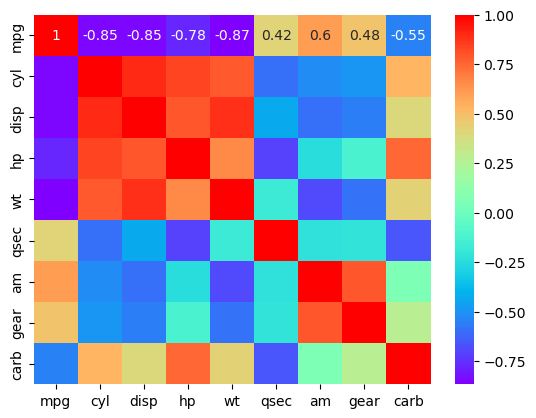

In [93]:
sb.heatmap(cars_ds.corr(numeric_only=True), annot=True, cmap="rainbow")

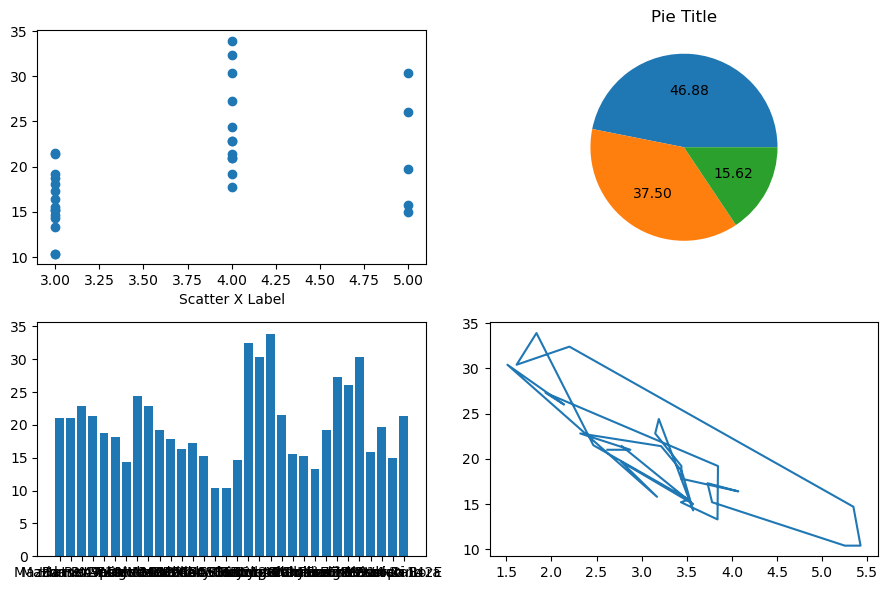

In [103]:
f,ax = plt.subplots(2,2, figsize=(9,6))

ax[0,0].scatter(cars_ds.gear, cars_ds.mpg)
ax[0,0].set_xlabel("Scatter X Label")

ax[0,1].pie(cars_ds.gear.value_counts(), autopct="%.2F")
ax[0,1].set_title("Pie Title")

ax[1,0].bar(x=cars_ds.model, height=cars_ds.mpg)

ax[1,1].plot(cars_ds.wt, cars_ds.mpg)

plt.tight_layout() # to adjust the padding between the internal Plots
plt.show()